In [13]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import sys
from IPython.display import display
import visuals as vs

In [14]:
#loading the data
train = pd.read_csv('./data/churn-bigml-80.csv')
test = pd.read_csv('./data/churn-bigml-20.csv')

## Exploring the data

In [15]:
#checking the data
display(train.head())

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [16]:
display(test.head())

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [18]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [19]:
train.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [20]:
#dropping the columns that are not needed
train.drop(['State','Area code'],axis=1,inplace=True)
test.drop(['State','Area code'],axis=1,inplace=True)

In [21]:
train.nunique()

Account length             205
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

In [22]:
train.dtypes

Account length              int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [23]:
#convert columns with unique values less than 10 to categorical
mask = train.nunique() < 10
train.loc[:, mask] = train.loc[:, mask].astype('object')
train.dtypes

Account length              int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                      object
dtype: object

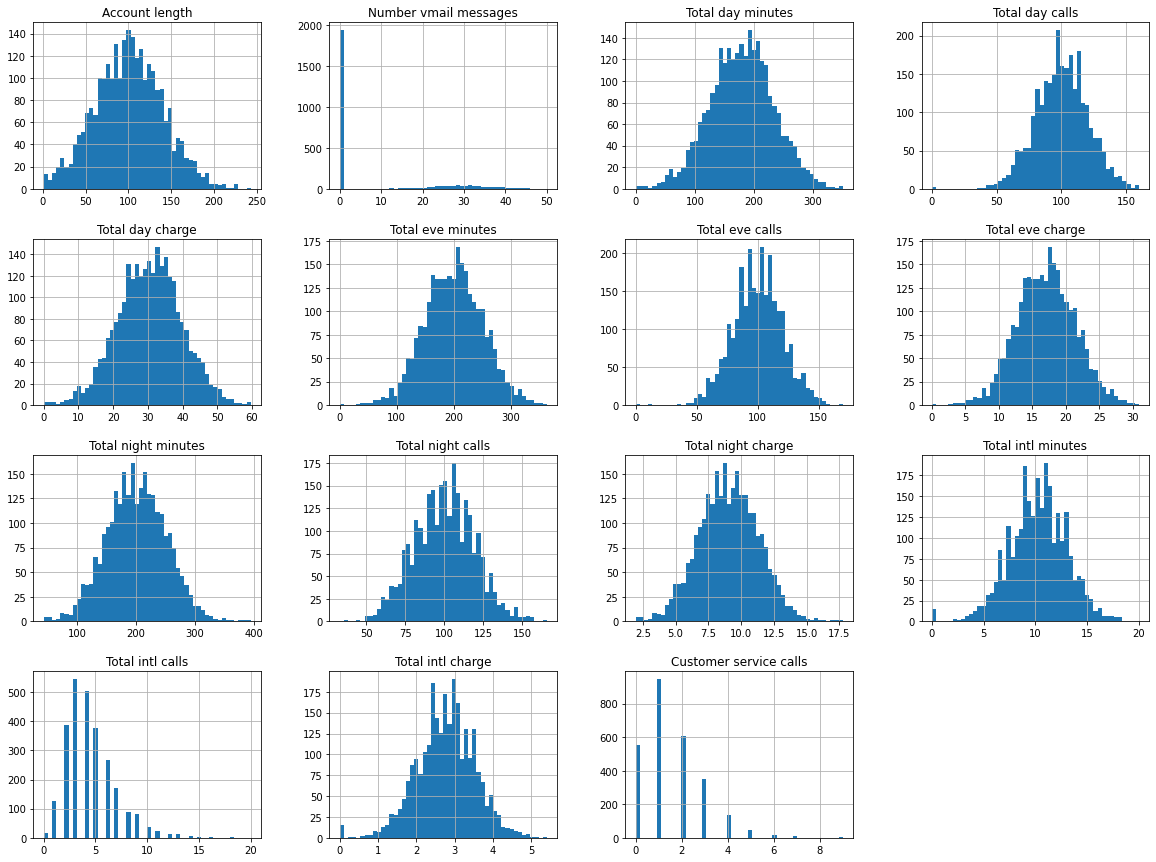

In [24]:
#data distribution
train.hist(bins=50, figsize=(20, 15));

In [37]:
#split data into features and labels for predicting attrition
features = train.drop(['Churn'], axis=1)
labels = train.Churn.astype('bool')
features_test = test.drop(['Churn'], axis=1)
labels_test = test.Churn.astype('bool')

In [38]:
#normalize the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = features.select_dtypes(include=['int64', 'float64'])
numerical_features_scaled = scaler.fit_transform(numerical_features)
numerical_features_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)
numerical_features_scaled.head()



,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.524793,0.50,0.755701,0.68750,0.755701,0.542755,0.582353,0.542866,0.572161,0.436090,0.572152,0.500,0.15,0.500000,0.111111
1,0.438017,0.52,0.460661,0.76875,0.460597,0.537531,0.605882,0.537690,0.599772,0.526316,0.600000,0.685,0.15,0.685185,0.111111
2,0.561983,0.00,0.693843,0.71250,0.693830,0.333242,0.647059,0.333225,0.338457,0.533835,0.338608,0.610,0.25,0.609259,0.000000
3,0.342975,0.00,0.853478,0.44375,0.853454,0.170195,0.517647,0.170171,0.436095,0.421053,0.436076,0.330,0.35,0.329630,0.222222
4,0.305785,0.00,0.475200,0.70625,0.475184,0.407754,0.717647,0.407959,0.407629,0.661654,0.407595,0.505,0.15,0.505556,0.333333


In [39]:
#normalize the numerical data for test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features_test = features_test.select_dtypes(include=['int64', 'float64'])
numerical_features_scaled_test = scaler.fit_transform(numerical_features_test)
numerical_features_scaled_test = pd.DataFrame(numerical_features_scaled_test, columns=numerical_features_test.columns)
numerical_features_scaled_test.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.502165,0.0,0.514267,0.496296,0.514400,0.967485,0.328244,0.967742,0.559071,0.360902,0.558994,0.475410,0.222222,0.475709,0.125
1,0.277056,0.0,0.334630,0.792593,0.334732,0.575072,0.351145,0.575019,0.538752,0.518797,0.539007,0.693989,0.333333,0.694332,0.500
2,0.692641,0.0,0.995460,0.274074,0.995422,0.859739,0.458015,0.859715,0.398839,0.646617,0.399097,0.295082,0.500000,0.295547,0.500
3,0.476190,0.0,0.273995,0.540741,0.274080,0.284348,0.496183,0.284321,0.483019,0.473684,0.482914,0.420765,0.333333,0.421053,0.250
4,0.207792,0.0,0.302853,0.644444,0.302880,0.532356,0.549618,0.532258,0.451379,0.360902,0.451322,0.606557,0.055556,0.607287,0.125


In [40]:
#categorical features normalization for train data
categorical_features = features.select_dtypes(include=['category', 'object'])
categorical_features_scaled = categorical_features.replace({'No': 0, 'Yes': 1})
categorical_features_scaled.head()


,International plan,Voice mail plan
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0


In [41]:
#categorical features normalization for test data
categorical_features_test = features_test.select_dtypes(include=['category', 'object'])
categorical_features_scaled_test = categorical_features_test.replace({'No': 0, 'Yes': 1})
categorical_features_scaled_test.head()

,International plan,Voice mail plan
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [42]:
#combine the scaled numerical and categorical features
features_final = pd.concat([numerical_features_scaled, categorical_features_scaled], axis=1)
features_final.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan,Voice mail plan
0,0.524793,0.50,0.755701,0.68750,0.755701,0.542755,0.582353,0.542866,0.572161,0.436090,0.572152,0.500,0.15,0.500000,0.111111,0,1
1,0.438017,0.52,0.460661,0.76875,0.460597,0.537531,0.605882,0.537690,0.599772,0.526316,0.600000,0.685,0.15,0.685185,0.111111,0,1
2,0.561983,0.00,0.693843,0.71250,0.693830,0.333242,0.647059,0.333225,0.338457,0.533835,0.338608,0.610,0.25,0.609259,0.000000,0,0
3,0.342975,0.00,0.853478,0.44375,0.853454,0.170195,0.517647,0.170171,0.436095,0.421053,0.436076,0.330,0.35,0.329630,0.222222,1,0
4,0.305785,0.00,0.475200,0.70625,0.475184,0.407754,0.717647,0.407959,0.407629,0.661654,0.407595,0.505,0.15,0.505556,0.333333,1,0


In [43]:
#label replace false to 0 and true to 1
labels_final = labels
labels_final.head()

0    False
1    False
2    False
3    False
4    False
Name: Churn, dtype: bool

In [44]:
#combine the scaled numerical and categorical features for test data
features_final_test = pd.concat([numerical_features_scaled_test, categorical_features_scaled_test], axis=1)
features_final_test.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan,Voice mail plan
0,0.502165,0.0,0.514267,0.496296,0.514400,0.967485,0.328244,0.967742,0.559071,0.360902,0.558994,0.475410,0.222222,0.475709,0.125,0,0
1,0.277056,0.0,0.334630,0.792593,0.334732,0.575072,0.351145,0.575019,0.538752,0.518797,0.539007,0.693989,0.333333,0.694332,0.500,0,0
2,0.692641,0.0,0.995460,0.274074,0.995422,0.859739,0.458015,0.859715,0.398839,0.646617,0.399097,0.295082,0.500000,0.295547,0.500,0,0
3,0.476190,0.0,0.273995,0.540741,0.274080,0.284348,0.496183,0.284321,0.483019,0.473684,0.482914,0.420765,0.333333,0.421053,0.250,0,0
4,0.207792,0.0,0.302853,0.644444,0.302880,0.532356,0.549618,0.532258,0.451379,0.360902,0.451322,0.606557,0.055556,0.607287,0.125,0,0


In [45]:
#labels_test replace false to 0 and true to 1
labels_final_test = labels_test
labels_final_test.head()

0    False
1     True
2     True
3    False
4    False
Name: Churn, dtype: bool

In [46]:
#split the data into train and test
X_train = features_final
y_train = labels_final
X_test = features_final_test
y_test = labels_final_test

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2666 samples.
Testing set has 667 samples.


In [47]:
#naive predictor
TP = np.sum(labels_final == 1) # Counting the ones as this is the naive case
FP = np.sum(labels_final == 0) # Specific to the naive case
TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

accuracy = (TP + TN) / labels_final.count()
recall = TP / (TP + FN)
precision = TP / (TP + FP)

#Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall
beta = 0.5
fscore = (1 + beta ** 2) * (precision * recall) / (beta ** 2 * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))


Naive Predictor: [Accuracy score: 0.1455, F-score: 0.1755]


In [48]:
#Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score, classification_report, confusion_matrix

#import the supervised learning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#create a list of the models to be tested

models = [RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=1),
          AdaBoostClassifier(n_estimators=100, random_state=1),
          GradientBoostingClassifier(n_estimators=100, random_state=1),
          VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=1)),
                                      ('ada', AdaBoostClassifier(n_estimators=100, random_state=1)),
                                      ('knn', KNeighborsClassifier(n_neighbors=3)),
                                      ('svm', SVC(kernel='rbf', probability=True)),
                                      ('lr', LogisticRegression(random_state=1))]),
            KNeighborsClassifier(n_neighbors=3),
            SVC(kernel='rbf', probability=True),
            LogisticRegression(random_state=1),
            DecisionTreeClassifier(criterion='entropy', random_state=1),
            XGBClassifier(n_estimators=100, random_state=1)]

#create a list of the names of the models

names = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'Voting', 'KNN', 'SVM', 'LR', 'DT', 'XGB']

#loop through the models and print the Fscore and accurcy results
for i in range(len(models)):
    #train each model on the training data
    models[i].fit(X_train, y_train)
    #make predictions on the test data
    predictions = models[i].predict(X_test)
    #calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    #calculate the fscore of the model
    fscore = fbeta_score(y_test, predictions, beta=0.5)
    #print the accuracy and fscore of each model
    print('Accuracy of %s: %.2f%%' % (names[i], accuracy * 100))
    print('F-score of %s: %.2f%%' % (names[i], fscore * 100))
    print()
    print(classification_report(y_test, predictions))
    print()
    print(confusion_matrix(y_test, predictions))

Accuracy of Random Forest: 94.90%
F-score of Random Forest: 83.91%

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       572
        True       0.86      0.77      0.81        95

    accuracy                           0.95       667
   macro avg       0.91      0.87      0.89       667
weighted avg       0.95      0.95      0.95       667


[[560  12]
 [ 22  73]]
Accuracy of AdaBoost: 86.36%
F-score of AdaBoost: 50.13%

              precision    recall  f1-score   support

       False       0.91      0.94      0.92       572
        True       0.53      0.42      0.47        95

    accuracy                           0.86       667
   macro avg       0.72      0.68      0.69       667
weighted avg       0.85      0.86      0.86       667


[[536  36]
 [ 55  40]]
Accuracy of Gradient Boost: 93.85%
F-score of Gradient Boost: 80.38%

              precision    recall  f1-score   support

       False       0.95      0.98      0.96    

In [49]:
#xgboost model with the best parameters

xgb = XGBClassifier(n_estimators=100, random_state=1, 
                    learning_rate=0.1, max_depth=5,
                    min_child_weight=1, gamma=0, subsample=0.8, 
                    colsample_bytree=0.8, objective='binary:logistic', 
                    nthread=-1, scale_pos_weight=1, seed=27)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
fscore = fbeta_score(y_test, predictions, beta=0.5)
print('Accuracy of %s: %.2f%%' % ('XGB', accuracy * 100))
print('F-score of %s: %.2f%%' % ('XGB', fscore * 100))
print()
print(classification_report(y_test, predictions))
print()
print(confusion_matrix(y_test, predictions))

Accuracy of XGB: 95.05%
F-score of XGB: 83.52%

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       572
        True       0.84      0.80      0.82        95

    accuracy                           0.95       667
   macro avg       0.91      0.89      0.90       667
weighted avg       0.95      0.95      0.95       667


[[558  14]
 [ 19  76]]
